# Sentiment Analysis of Yelp Restaurant Reviews

in this notebook, I will perform sentiment analysis using two techniques:
1. VADER (Bag of words)
2. Roberta Pretrained Model from Huggingface

I also will use a **Naive Bayes** model to classify the reviews as positive or negative.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/calebtran7/NLP-Sentiment-Analysis-Yelp-Restaurant-Reviews/main/Yelp%20Restaurant%20Reviews.csv')

In [6]:
df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [7]:
df['Review Text'].values[0]

'All I can say is they have very good ice cream I would for sure recommend their cookies and creme ice cream it is very good'

In [8]:
df.shape

(19896, 4)

In [9]:
df['Id'] = range(1, 19897)

In [10]:
df.head()

,Yelp URL,Rating,Date,Review Text,Id
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,1
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,2
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,3
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,4
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,5


## Preliminary EDA

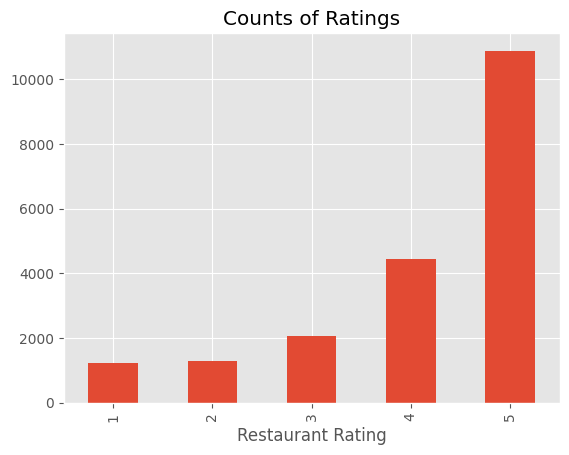

In [11]:
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',
                                              title = 'Counts of Ratings')
ax.set_xlabel('Restaurant Rating')
plt.show()

## Preliminary NLTK

In [12]:
ex = df['Review Text'][50]
print(ex)

So happy my brother and sister-in-law sent over a little surprise from Rewind. Now I have this place on my list. Drinks were super yummy. The Thai tea was delicious and is always a good drink to default on when you're having a hard time choosing from all the other milk teas. I'll have to stop in to see the rest of the menu but I'm confident that they'll be just as good as the three that were delivered. Also, their quality does not lack as you can see from the photos. The drinks traveled well.


In [13]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(ex)
tokens[:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['So',
 'happy',
 'my',
 'brother',
 'and',
 'sister-in-law',
 'sent',
 'over',
 'a',
 'little',
 'surprise',
 'from',
 'Rewind',
 '.',
 'Now',
 'I',
 'have',
 'this',
 'place',
 'on']

In [14]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('So', 'RB'),
 ('happy', 'JJ'),
 ('my', 'PRP$'),
 ('brother', 'NN'),
 ('and', 'CC'),
 ('sister-in-law', 'NN'),
 ('sent', 'NN'),
 ('over', 'IN'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('surprise', 'NN'),
 ('from', 'IN'),
 ('Rewind', 'NNP'),
 ('.', '.'),
 ('Now', 'RB'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('this', 'DT'),
 ('place', 'NN'),
 ('on', 'IN')]

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  So/RB
  happy/JJ
  my/PRP$
  brother/NN
  and/CC
  sister-in-law/NN
  sent/NN
  over/IN
  a/DT
  little/JJ
  surprise/NN
  from/IN
  (GPE Rewind/NNP)
  ./.
  Now/RB
  I/PRP
  have/VBP
  this/DT
  place/NN
  on/IN
  my/PRP$
  list/NN
  ./.
  Drinks/NNS
  were/VBD
  super/JJ
  yummy/NN
  ./.
  The/DT
  (GPE Thai/NNP)
  tea/NN
  was/VBD
  delicious/JJ
  and/CC
  is/VBZ
  always/RB
  a/DT
  good/JJ
  drink/NN
  to/TO
  default/VB
  on/IN
  when/WRB
  you/PRP
  're/VBP
  having/VBG
  a/DT
  hard/JJ
  time/NN
  choosing/VBG
  from/IN
  all/PDT
  the/DT
  other/JJ
  milk/NN
  teas/NNS
  ./.
  I/PRP
  'll/MD
  have/VB
  to/TO
  stop/VB
  in/IN
  to/TO
  see/VB
  the/DT
  rest/NN
  of/IN
  the/DT
  menu/NN
  but/CC
  I/PRP
  'm/VBP
  confident/JJ
  that/IN
  they/PRP
  'll/MD
  be/VB
  just/RB
  as/RB
  good/JJ
  as/IN
  the/DT
  three/CD
  that/WDT
  were/VBD
  delivered/VBN
  ./.
  Also/RB
  ,/,
  their/PRP$
  quality/NN
  does/VBZ
  not/RB
  lack/VB
  as/IN
  you/PRP
  can/MD
  see/VB
 

# VADER Sentiment Scoring

"Bag of words" approach:
1. Remove stop words
2. Get the positive/neutral/negative score for each word and combine to a total score

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [17]:
sia.polarity_scores('I am having an awesome day!')

{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.6588}

In [18]:
sia.polarity_scores('I am so upset and angry.')

{'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'compound': -0.7548}

In [19]:
sia.polarity_scores(ex)

{'neg': 0.026, 'neu': 0.724, 'pos': 0.25, 'compound': 0.97}

In [20]:
# Run the polarity score on the entire dataset

res = {}
for i, r in tqdm(df.iterrows(), total=len(df)):
  text = r['Review Text']
  myid = r['Id']
  res[myid] = sia.polarity_scores(text)


  0%|          | 0/19896 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [22]:
# Sentiment score and initial dataset
vaders.head()

,Id,neg,neu,pos,compound,Yelp URL,Rating,Date,Review Text
0,1,0.000,0.641,0.359,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,2,0.022,0.660,0.318,0.9509,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,3,0.000,0.651,0.349,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,4,0.020,0.752,0.227,0.9400,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,5,0.027,0.730,0.243,0.9924,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


# VADER Results Plotted

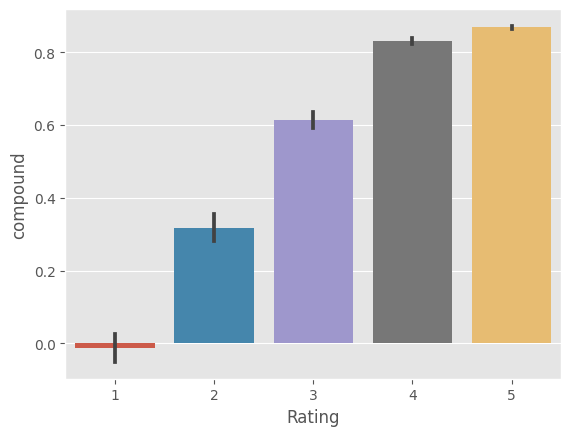

In [23]:
sns.barplot(data=vaders, x = 'Rating', y = 'compound')
ax.set_title('Compound Score by Yelp Star Rating')
plt.show()

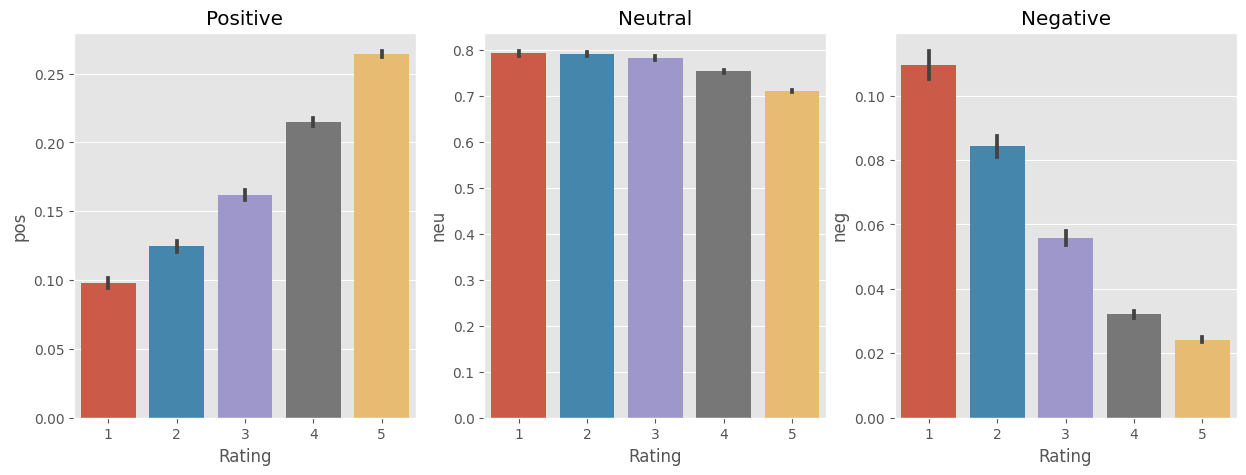

In [24]:
fig, axs= plt.subplots(1, 3, figsize = (15, 5))
sns.barplot(data=vaders, x='Rating', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


## Naive Bayes Model

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
df = pd.DataFrame(vaders)
df['label'] = df['compound'].apply(lambda score: 'positive' if score > 0.6 else 'negative')
df.head()

,Id,neg,neu,pos,compound,Yelp URL,Rating,Date,Review Text,label
0,1,0.000,0.641,0.359,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,positive
1,2,0.022,0.660,0.318,0.9509,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,positive
2,3,0.000,0.651,0.349,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,positive
3,4,0.020,0.752,0.227,0.9400,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,positive
4,5,0.027,0.730,0.243,0.9924,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,positive


In [27]:
X = df['Review Text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Convert the text data into feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [29]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)
predictions = naive_bayes_model.predict(X_test_vectorized)

#### Accuracy of Naive Bayes Model:

In [30]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.86


In [31]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.40      0.49       667
    positive       0.89      0.95      0.92      3313

    accuracy                           0.86      3980
   macro avg       0.75      0.68      0.70      3980
weighted avg       0.84      0.86      0.85      3980



## Roberta Pretrained Model (Transformer-based)

Transformer model accounts for not only the words, but also the context related to other words.



In [32]:
!pip install transformers

In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
# Model that has been pre-trained for sentiment
# Transfer learning
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [35]:
# VADER score results on this example review
print(ex)
sia.polarity_scores(ex)

So happy my brother and sister-in-law sent over a little surprise from Rewind. Now I have this place on my list. Drinks were super yummy. The Thai tea was delicious and is always a good drink to default on when you're having a hard time choosing from all the other milk teas. I'll have to stop in to see the rest of the menu but I'm confident that they'll be just as good as the three that were delivered. Also, their quality does not lack as you can see from the photos. The drinks traveled well.


{'neg': 0.026, 'neu': 0.724, 'pos': 0.25, 'compound': 0.97}

In [36]:
# Run the example for Roberta Model
encoded_text = tokenizer(ex, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.0018132817, 'roberta_neu': 0.009613755, 'roberta_pos': 0.98857296}


In [37]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(ex, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores

  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [38]:
shortened_df = df.head(300)

In [39]:
res = {}
for i, r in tqdm(shortened_df.iterrows(), total=len(shortened_df)):
  text = r['Review Text']
  myid = r['Id']
  vader_result = sia.polarity_scores(text)
  vader_result_rename = {}
  for key, value in vader_result.items():
    vader_result_rename[f"vader_{key}"] = value

  roberta_result = polarity_scores_roberta(text)
  both = {**vader_result_rename, **roberta_result}
  res[myid] = both

  0%|          | 0/300 [00:00<?, ?it/s]

In [40]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

# The Transformers Pipeline (Predictions)

In [41]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [42]:
sent_pipeline("The food was so good!")

[{'label': 'POSITIVE', 'score': 0.9998691082000732}]

In [43]:
sent_pipeline("The steak was undercooked and the service was poor.")

[{'label': 'NEGATIVE', 'score': 0.9997597336769104}]